<a href="https://colab.research.google.com/github/KrushnaTaur/ML-Practice/blob/main/ML_Lab_Experiments/ML_Experiment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 10

In [ ]:
# --------------------------------------------------
# 🧩 Step 1: Import required libraries
# --------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# --------------------------------------------------
# 🧩 Step 2: Load your dataset
# --------------------------------------------------
# Replace with your file path or uploaded dataset name
file_path = "/content/Student_Dataset_Cleaned (3).csv"
df = pd.read_csv(file_path)

print("✅ Dataset Loaded Successfully!")
print(df.shape)
df.head()

✅ Dataset Loaded Successfully!
(4424, 33)


,Marital_status,Daytime_evening_attendance_,Previous_qualification,Previous_qualification_grade_,Mother_s_qualification,Father_s_qualification,Mother_s_occupation,Father_s_occupation,Admission_grade,Displaced,...,Curricular_units_2nd_sem_enrolled_,Curricular_units_2nd_sem_evaluations_,Curricular_units_2nd_sem_approved_,Curricular_units_2nd_sem_without_evaluations_,Unemployment_rate,Inflation_rate,GDP,Target,Overall_Performance,Financial_Stability_Score
0,0.693147,713.434901,0.693147,122.0,19,12,1.459736,1.829314,127.3,1,...,0,0,0,0.0,10.8,1.4,1.74,1,7.137500,354.933348
1,0.693147,713.434901,0.693147,160.0,1,3,1.181467,1.204206,142.5,1,...,6,6,6,0.0,13.9,-0.3,0.79,0,13.833333,0.000000
2,0.693147,713.434901,0.693147,122.0,37,37,1.774292,1.829314,124.8,1,...,6,0,0,0.0,10.8,1.4,1.74,1,7.137500,0.000000
3,0.693147,713.434901,0.693147,122.0,38,37,1.459736,1.204206,119.6,1,...,6,10,5,0.0,9.4,-0.8,-3.12,0,12.914286,354.933348
4,1.098612,0.000000,0.693147,100.0,37,38,1.774292,1.829314,141.5,0,...,6,6,6,0.0,13.9,-0.3,0.79,0,12.666667,354.933348


In [ ]:
# --------------------------------------------------
# 🧩 Step 3: Encode categorical columns (if not already)
# --------------------------------------------------
cat_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("🔢 Label Encoding Applied on Categorical Columns.")


🔢 Label Encoding Applied on Categorical Columns.


In [ ]:
# --------------------------------------------------
# 🧩 Step 4: Define features (X) and target (y)
# --------------------------------------------------
# Replace 'target' with your actual column name (case-sensitive)
y = df['Target']
X = df.drop('Target', axis=1)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (4424, 32)
y shape: (4424,)


In [ ]:
# --------------------------------------------------
# 🧩 Step 5: Train-test split & scaling
# --------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print("✅ Data Split and Scaled Successfully!")

Training samples: 3539, Testing samples: 885
✅ Data Split and Scaled Successfully!


In [ ]:
# --------------------------------------------------
# 🧩 Step 6: AdaBoost Classifier
# --------------------------------------------------
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

print("🎯 AdaBoost Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_ada)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))

🎯 AdaBoost Results:
Accuracy: 87.23 %

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       601
           1       0.83      0.75      0.79       284

    accuracy                           0.87       885
   macro avg       0.86      0.84      0.85       885
weighted avg       0.87      0.87      0.87       885



In [ ]:
# --------------------------------------------------
# 🧩 Step 7: Gradient Boosting Classifier
# --------------------------------------------------
gb = GradientBoostingClassifier(
    n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42
)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("🌟 Gradient Boosting Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_gb)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

🌟 Gradient Boosting Results:
Accuracy: 87.34 %

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       601
           1       0.84      0.75      0.79       284

    accuracy                           0.87       885
   macro avg       0.86      0.84      0.85       885
weighted avg       0.87      0.87      0.87       885



/tmp/ipython-input-3833293015.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


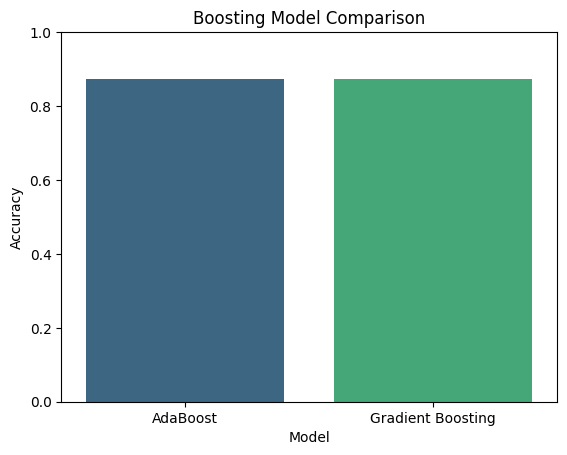

               Model  Accuracy
0           AdaBoost  0.872316
1  Gradient Boosting  0.873446


In [ ]:
# --------------------------------------------------
# 🧩 Step 8: Compare Performance
# --------------------------------------------------
acc_ada = accuracy_score(y_test, y_pred_ada)
acc_gb = accuracy_score(y_test, y_pred_gb)

results = pd.DataFrame({
    'Model': ['AdaBoost', 'Gradient Boosting'],
    'Accuracy': [acc_ada, acc_gb]
})

sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title("Boosting Model Comparison")
plt.ylim(0, 1)
plt.show()

print(results)


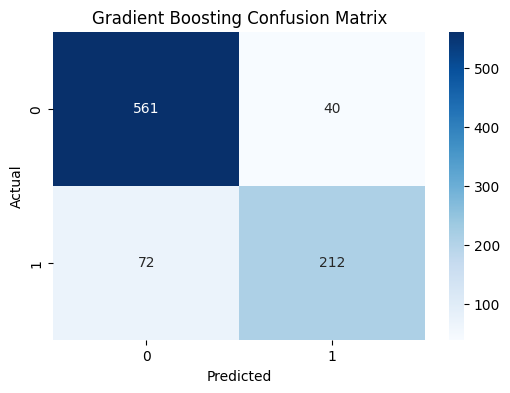

In [ ]:
# --------------------------------------------------
# 🧩 Step 9: Confusion Matrix for the best model
# --------------------------------------------------
best_model = gb if acc_gb > acc_ada else ada
best_name = "Gradient Boosting" if acc_gb > acc_ada else "AdaBoost"

y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title(f"{best_name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()